In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Need to create a spotify developer account to access data (free) 
# Then navigate to dashbboard and create a project
# After creating a project, copy client ID and client secret
# Need to run command from terminal: pip install spotipy 
cid = 'accc4df73a694fabbce2979c05a8bf40'
secret = 'dbc8258de4a34382b6e51e2c99d30527'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=cid, client_secret=secret))

In [ ]:
# urls of top songs of each year according to spotify
top_2021_url = 'https://open.spotify.com/playlist/37i9dQZF1DX18jTM2l2fJY?si=8b783d32e1b94960'
top_2020_url = 'https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS?si=0faff1f0fc9d4ee2'
top_2019_url = 'https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9?si=381011c3547342de'
top_2018_url = 'https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8?si=9048770b740f4e3b'
top_2017_url = 'https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW?si=c495c49a26b246a7'
top_2016_url = 'https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R?si=c312d229e63f41b5'
top_2015_url = 'https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ?si=8bfbd597717f4c45'
top_2014_url = 'https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4?si=cc89e28b013e4a80'
top_2013_url = 'https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer?si=fc12adfe75444714'
top_2012_url = 'https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3?si=6aaa12f759eb41a7'
top_2011_url = 'https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ?si=53960ef314664e7a'
top_2010_url = 'https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj?si=cb9e8fdf3d7f4c0c'
top_2009_url = 'https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp?si=3f24f53ccbdf4512'
top_2008_url = 'https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm?si=00727ff42b5a4826'

urls = [top_2021_url, top_2020_url, top_2019_url, top_2018_url, top_2017_url, top_2016_url, top_2015_url, top_2014_url,
        top_2013_url, top_2012_url, top_2011_url, top_2010_url, top_2009_url, top_2008_url]


# Columns of the data frame: name of artist, main genre, popularity score, year of popularity, name of song
names = []
inv_genre = []
pop = []
years = []
songs = []

counter = 0
year = 2021

In [ ]:
# Going through all urls 
for url in urls:
    
    #using spotify web scraper
    results = spotify.playlist(url)
    
    # iterating through each song
    for item in results['tracks']['items']:
        
        # Finding the top 50 songs of each year
        if (counter < 50):
            counter += 1
            
            # iterating through the artist(s) on each song max:3
            for artist in item['track']['artists']:
                
                # finding data on the artist using spotify web scraper
                artist_uri = artist['uri']
                artist_data = spotify.artist(artist_uri)
                
                
                # finding the genre of the artist
                helper = [genre for genre in artist_data['genres']]
                if (len(helper) > 0):
                    
                    # appending to data frame
                    names.append(artist_data['name'])
                    inv_genre.append(helper[0])
                    pop.append(artist_data['popularity'])
                    years.append(year)
                    songs.append(item['track']['name'])
                    
    counter = 0
    year -= 1

# These lengths should all be the same
print(len(names))
print(len(inv_genre))
print(len(pop))
print(len(years))


In [ ]:
# Creates Dataframe of all the data
overall_df = pd.DataFrame({'Artist Name': names, 'Track': songs,'Main Genre': inv_genre, 
                         'Popularity': pop, 'Year in Top 50': years})
overall_df.tail()
# overall_df.to_csv('music.csv')

In [2]:
overall_df = pd.read_csv('music.csv')
overall_df.drop('Unnamed: 0', inplace=True, axis=1)
overall_df

,Artist Name,Track,Main Genre,Popularity,Year in Top 50
0,Harry Styles,As It Was,pop,89,2021
1,Glass Animals,Heat Waves,gauze pop,78,2021
2,The Kid LAROI,STAY (with Justin Bieber),australian hip hop,81,2021
3,Justin Bieber,STAY (with Justin Bieber),canadian pop,90,2021
4,Bad Bunny,Me Porto Bonito,reggaeton,98,2021
...,...,...,...,...,...
974,Jonas Brothers,Burnin' Up,boy band,75,2008
975,Natasha Bedingfield,Pocketful of Sunshine,dance pop,64,2008
976,Jeezy,Put On,atl hip hop,70,2008
977,Kanye West,Put On,chicago rap,90,2008


In [3]:
new_df = overall_df.groupby(['Main Genre']).size().reset_index()
# new_df = latin_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
# new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
# new_df = new_df.rename(columns={0:"Number of Latin Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
new_df

,Main Genre,0
0,acid house,1
1,acoustic pop,3
2,adult standards,1
3,afro dancehall,2
4,afrofuturism,2
...,...,...
138,tropical house,1
139,uk funky,1
140,uk hip hop,1
141,uk pop,1


In [ ]:
# overall_df.to_csv('music.csv')

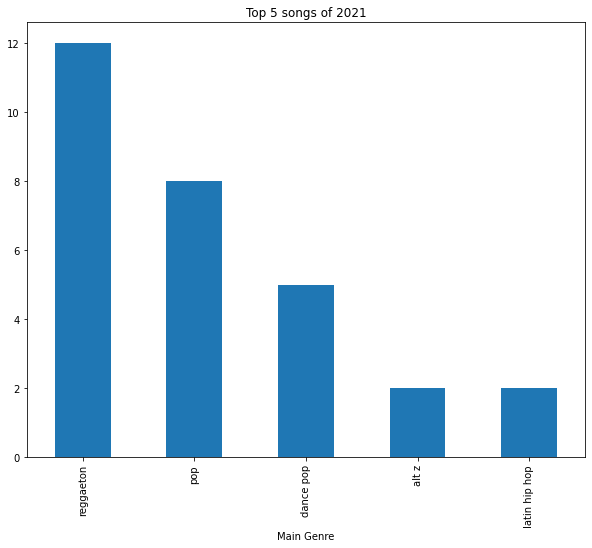

In [4]:
for i in range(2008,2022):
    sub_df = overall_df[overall_df['Year in Top 50'] == i]
    sub_df = sub_df.groupby(['Main Genre']).size()
    sub_df = sub_df.sort_values(ascending=False)[:5]
    plt.pause(0.5)
    ax = sub_df.plot.bar(figsize=(10,8))
    ax.set_title("Top 5 songs of " + str(i))
    plt.show()
    clear_output(wait = True)

<AxesSubplot:xlabel='Top 50 Tracks of the Year'>

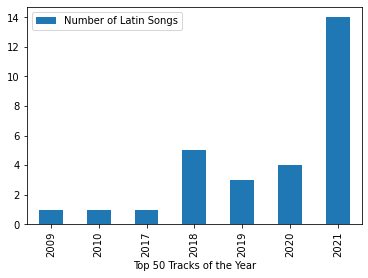

In [5]:
latin_genres = ['reggaeton', 'trap latino','puerto rican pop','colombian pop', 'cumbia',
                'latin hip hop','reggaeton flow','reggaeton colombiano','latin pop', 'pop argentino']
latin_df = overall_df[overall_df['Main Genre'].isin(latin_genres)]


new_df = latin_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of Latin Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
new_df.plot.bar()

In [13]:
asia_genres = ['k-hop','K-indie','k-pop','Indian Pop','Indian Rock','Deep Indian Pop','C-pop','Chinese Indie Rock']

asia_df = overall_df[overall_df['Main Genre'].isin(asia_genres)]

new_df = asia_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of Asian Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
# new_df.plot.bar()

In [14]:
euro_genres = ['classic eurovision', 'deep euro house', 'deep eurodance','eurobeat','eurodance',
               'europop','eurovision','french hip hop', 'french shoegaze', 'uk hip hop','british soul',
              'german pop','swedish pop', 'uk funky', 'uk pop']

euro_df = overall_df[overall_df['Main Genre'].isin(euro_genres)]

new_df = euro_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of European Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
# new_df.plot.bar()

In [15]:
afro_genres = ['African Percussion', 'African Rock', 'Arikaans', 'Afrobeat', 'Afrobeats','afrofuturism',
              'afro dancehall']

afro_df = overall_df[overall_df['Main Genre'].isin(afro_genres)]

new_df = afro_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of Afro Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
# new_df.plot.bar()

In [16]:
update_df = overall_df.copy()

update = overall_df['Main Genre'].isin(latin_genres)
update_df.loc[update, 'Main Genre'] = 'latin'

update = overall_df['Main Genre'].isin(asia_genres)
update_df.loc[update, 'Main Genre'] = 'asian'

update = overall_df['Main Genre'].isin(euro_genres)
update_df.loc[update, 'Main Genre'] = 'euro'

update = overall_df['Main Genre'].isin(afro_genres)
update_df.loc[update, 'Main Genre'] = 'afro'

# update_df

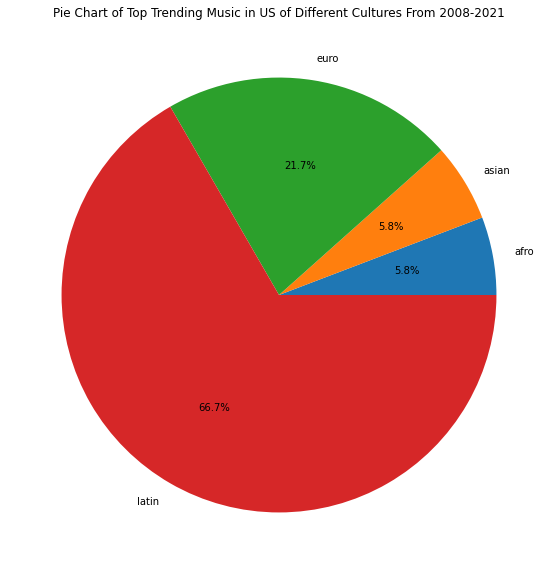

In [10]:
diff_genres = ['latin', 'asian', 'euro', 'afro']
diff_df = update_df[update_df['Main Genre'].isin(diff_genres)]
diff_df = diff_df.groupby(['Main Genre']).size()
ax = diff_df.plot.pie(y='Main Genre', figsize = (10,10),autopct='%1.1f%%')
ax.set_title('Pie Chart of Top Trending Music in US of Different Cultures From 2008-2021')
ax.set_ylabel("")
plt.show()

In [17]:
cultures_df = update_df.copy()
update = cultures_df['Main Genre'].isin(diff_genres)
cultures_df.loc[update, 'Main Genre'] = 'Foreign'
# cultures_df

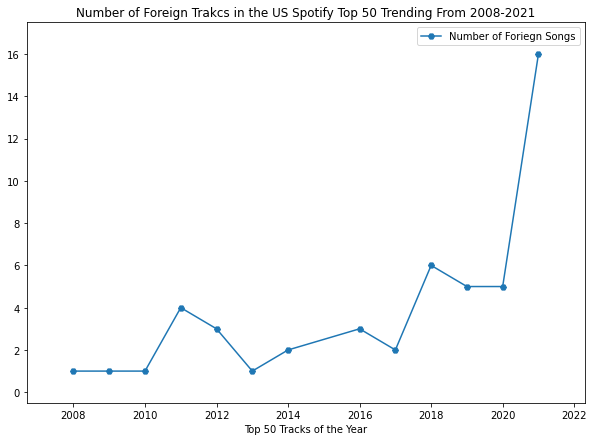

In [12]:
cultures_df = cultures_df[cultures_df['Main Genre'].isin(['Foreign'])]
new_df = cultures_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of Foriegn Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
ax = new_df.plot.line(marker='H', figsize=(10,7))
ax.set_title('Number of Foreign Trakcs in the US Spotify Top 50 Trending From 2008-2021')
ax.margins(y=.1, x=.1)
plt.show()